# Adatbányászat - Web scraping

Adatok és információk weboldalakról kinyerésével foglalkozik.

## Könyvtárak telepítése, importálása

In [107]:
#%pip install bs4
#%pip install requests

In [108]:
from bs4 import BeautifulSoup
import requests as re
import time

## 1. Mintafeladat

https://www.scrapethissite.com/pages/simple/ weboldalról gyűjtsük ki az adatokat.

<b>Megoldáshoz vezető lépések:</b>
1. weboldal felmérése
2. kérdés(ek) megfogalmazása
3. adatgyűjtés
4. küzdelem a begyűjtött adatokkal
5. kérdés(ek) megválaszolása
6. megoldás bemutatása mások számára is érthető módon

### Weboldal elérése

In [109]:
url = "https://www.scrapethissite.com/pages/simple/"

response = re.get(url)
print(response)

<Response [200]>


### Kiíratás terjedelmének limitálása

Teljes HTML kód kiíratása jellemzően nagy terjedelemmel jár, ezt az alábbi függvénnyel limitáljuk.

In [110]:
def printLimited(obj, depth):
    print(str(obj)[:depth])

### Weboldal tartalmának kinyerése

In [111]:
soup = BeautifulSoup(response.text, "html.parser")

printLimited(soup,1000)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>
<link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
<link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
<meta content="noindex" name="robots"/>
<link h

### Cím kiíratása - <code>title</code>

In [112]:
print(soup.title)
print(soup.title.string)

<title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>
Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping


### Ország(ok) nevei - <code>find</code> és <code>find_all</code>

In [113]:
#h3
countries = soup.find()
printLimited(countries,1000)


<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>
<link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
<link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
<meta content="noindex" name="robots"/>
<link href="https://lipi

In [114]:

countries = soup.find("h3")
printLimited(countries,1000)

<h3 class="country-name">
<i class="flag-icon flag-icon-ad"></i>
                            Andorra
                        </h3>


### Ország(ok) adatai

Milyen tag tartalmazza a kívánt adatot? Van azonosítója?

In [115]:
print(soup.find("span", class_="country-capital").text)

Andorra la Vella


### Leg... országok

- Mennyi a legnagyobb ország népessége?
- Milyen lenne az "átlagos" ország?
- Hány ország adatait gyűjtöttük ki?

In [116]:
population = soup.find_all("span", class_="country-population")

population_numbers = []

for item in population:
    population_numbers.append(int(item.text))

## 2. Kiválasztott weboldal elérése

200-as kód sikeres lekérést jelöl

In [117]:
url = "https://hu.wikipedia.org/wiki/Kateg%C3%B3ria:N%C3%B6v%C3%A9nycsal%C3%A1dok"

response = re.get(url)
print(response.status_code)

if response.status_code == 200:
    print("Siker!")

200
Siker!


## BeautifulSoup könyvtár alapok

Weboldal struktúrájának kinyerése

In [118]:
soup = BeautifulSoup(response.text, "html.parser")

### Feladat - ellenőrizd le a <code>soup</code> változó tartalmát!

In [119]:
printLimited(soup,1000)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-disabled vector-toc-not-available" dir="ltr" lang="hu">
<head>
<meta charset="utf-8"/>
<title>Kategória:Növénycsaládok – Wikipédia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-di

A kiíratást meg lehet csinálni szebben is a <code>prettify()</code> paranccsal

In [120]:
printLimited(soup.prettify(),1000)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-disabled vector-toc-not-available" dir="ltr" lang="hu">
 <head>
  <meta charset="utf-8"/>
  <title>
   Kategória:Növénycsaládok – Wikipédia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-ma

### Bizonyos HTML tag keresése

<code>prettify()</code> itt is működik

In [121]:
articles = soup.find("div")
printLimited(articles,1000)

<div class="vector-header-container">
<header class="vector-header mw-header">
<div class="vector-header-start">
<nav aria-label="Wiki" class="vector-main-menu-landmark" role="navigation">
<div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown">
<input aria-haspopup="true" aria-label="Főmenü" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>
<label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-main-menu-dropdown-checkbox" id="vector-main-menu-dropdown-label"><span class="vector-icon mw-ui-icon-menu mw-ui-icon-wikimedia-menu"></span>
<span class="vector-dropdown-label-text">Főmenü</span>
</label>
<div class="vector-dropdown-content">
<div class="vector-unpinned-container

A választott weboldalon jobb kattintás után <code>Vizsgálat</code> (<code>Inspect</code>) funkció sok hasznos információt árul el a weboldal felépítéséről.

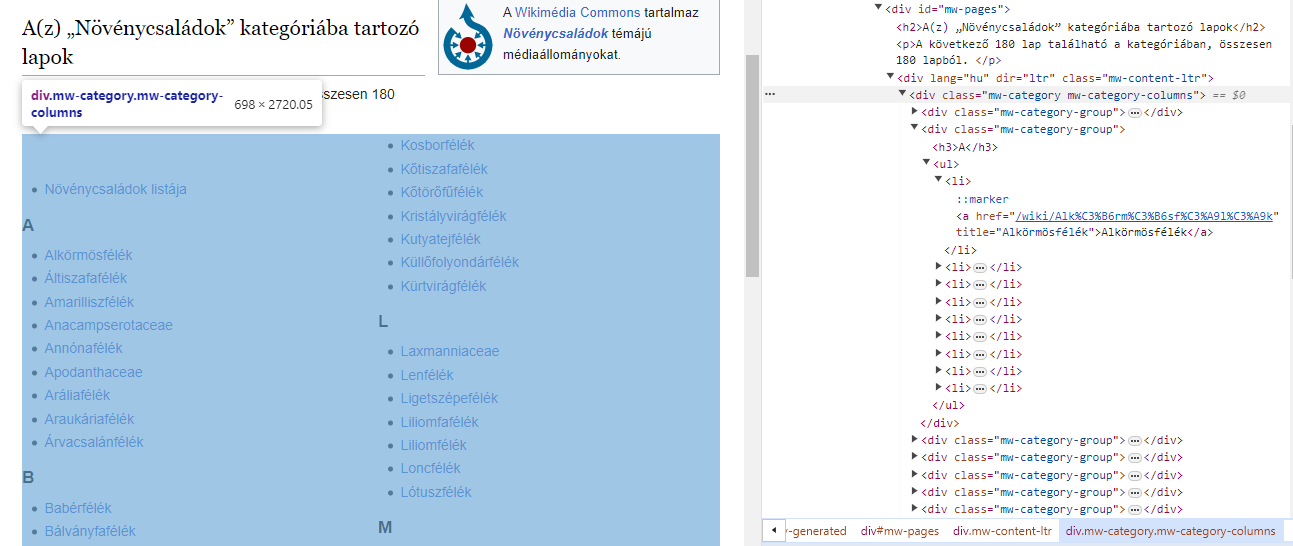

In [122]:
#mw-category mw-category-columns

articles = soup.find("div", class_="mw-category mw-category-columns")
printLimited(articles,1000)

<div class="mw-category mw-category-columns"><div class="mw-category-group"><h3> </h3>
<ul><li><a href="/wiki/N%C3%B6v%C3%A9nycsal%C3%A1dok_list%C3%A1ja" title="Növénycsaládok listája">Növénycsaládok listája</a></li></ul></div><div class="mw-category-group"><h3>A</h3>
<ul><li><a href="/wiki/Alk%C3%B6rm%C3%B6sf%C3%A9l%C3%A9k" title="Alkörmösfélék">Alkörmösfélék</a></li>
<li><a href="/wiki/%C3%81ltiszafaf%C3%A9l%C3%A9k" title="Áltiszafafélék">Áltiszafafélék</a></li>
<li><a href="/wiki/Amarilliszf%C3%A9l%C3%A9k" title="Amarilliszfélék">Amarilliszfélék</a></li>
<li><a href="/wiki/Anacampserotaceae" title="Anacampserotaceae">Anacampserotaceae</a></li>
<li><a href="/wiki/Ann%C3%B3naf%C3%A9l%C3%A9k" title="Annónafélék">Annónafélék</a></li>
<li><a href="/wiki/Apodanthaceae" title="Apodanthaceae">Apodanthaceae</a></li>
<li><a href="/wiki/Ar%C3%A1liaf%C3%A9l%C3%A9k" title="Aráliafélék">Aráliafélék</a></li>
<li><a href="/wiki/Arauk%C3%A1riaf%C3%A9l%C3%A9k" title="Araukáriafélék">Araukáriafélék</a

In [123]:
links = []
for link in articles.find_all('a'):
    links.append("https://hu.wikipedia.org"+link.get('href'))

for item in links:
    print(item)

https://hu.wikipedia.org/wiki/N%C3%B6v%C3%A9nycsal%C3%A1dok_list%C3%A1ja
https://hu.wikipedia.org/wiki/Alk%C3%B6rm%C3%B6sf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/%C3%81ltiszafaf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/Amarilliszf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/Anacampserotaceae
https://hu.wikipedia.org/wiki/Ann%C3%B3naf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/Apodanthaceae
https://hu.wikipedia.org/wiki/Ar%C3%A1liaf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/Arauk%C3%A1riaf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/%C3%81rvacsal%C3%A1nf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/Bab%C3%A9rf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/B%C3%A1lv%C3%A1nyfaf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/Ban%C3%A1nf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/Barkamirtuszf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/Beg%C3%B3niaf%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/B%C3%A9kasz%C5%91l%C5%91f%C3%A9l%C3%A9k
https://hu.wikipedia.org/wiki/B%C3%A9katutajf%C3%A9l

## Egy weblap adatainak kigyűjtése

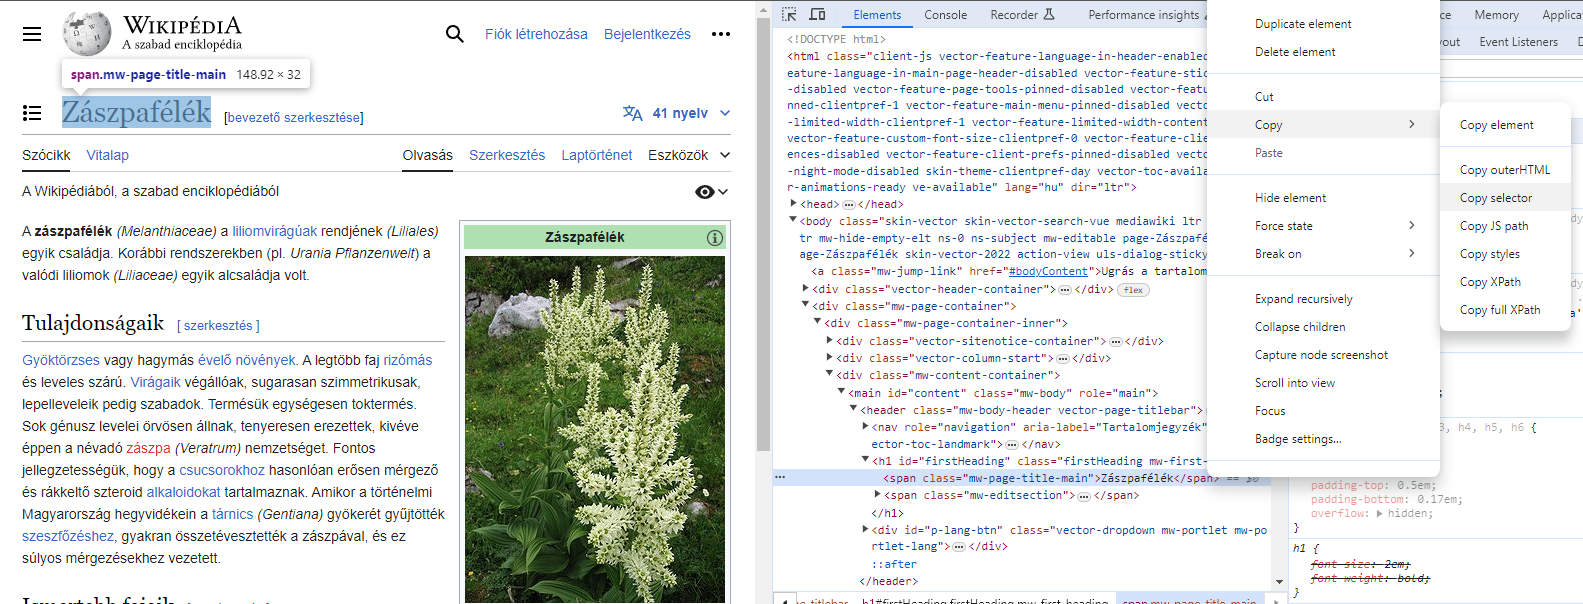

In [124]:
#mw-content-text > div.mw-content-ltr.mw-parser-output > p:nth-of-type(2)
#firstHeading > span.mw-page-title-main

url = "https://hu.wikipedia.org/wiki/Z%C3%A1szpaf%C3%A9l%C3%A9k"
response = re.get(url)
soup = BeautifulSoup(response.text, "html.parser")

x = soup.select("#mw-content-text > div.mw-content-ltr.mw-parser-output > p:nth-of-type(2)")
title = soup.select("#firstHeading > span.mw-page-title-main")
print(title[0].text)
print(x[0].text)

Zászpafélék
Gyöktörzses vagy hagymás évelő növények. A legtöbb faj rizómás és leveles szárú. Virágaik végállóak, sugarasan szimmetrikusak, lepelleveleik pedig szabadok. Termésük egységesen toktermés. Sok génusz levelei örvösen állnak, tenyeresen erezettek, kivéve éppen a névadó zászpa (Veratrum) nemzetséget. Fontos jellegzetességük, hogy a csucsorokhoz hasonlóan erősen mérgező és rákkeltő szteroid alkaloidokat tartalmaznak. Amikor a történelmi Magyarország hegyvidékein a tárnics (Gentiana) gyökerét gyűjtötték szeszfőzéshez, gyakran összetévesztették a zászpával, és ez súlyos mérgezésekhez vezetett.



## Összes weblap adatainak kigyűjtése fájlba

In [125]:
for item in range(0,10):    
    response = re.get(links[item])
    soup = BeautifulSoup(response.text, "html.parser")
    title = soup.select("#firstHeading > span.mw-page-title-main")[0].text
    description = soup.find("div", {"class": "mw-content-ltr mw-parser-output"}).find_all("p")[2].text
    print(str(item) + ". weboldal feldolgozva:")
    print(title)
    print(description)  
    open("data.csv", "a", encoding = "utf-8").write(str(title) + ',' + str(description))    
    time.sleep(1)

0. weboldal feldolgozva:
Növénycsaládok listája
A táblázatokban alfabetikus sorrendben latin név szerint vannak felsorolva a családok.

1. weboldal feldolgozva:
Alkörmösfélék
Az alkörmösfélék (Phytolaccaceae) a szegfűvirágúak (Caryophyllales) rendjének egyik családja. 16 nemzetségébe mintegy 120 faj tartozik.

2. weboldal feldolgozva:
Áltiszafafélék
Az áltiszafafélék és a tiszafák hasonlóságát régebben konvergens sajátosságoknak hitték, és ez ki is fejeződött a rendszerekben. Soó Rezső az áltiszafaféléket a valódi tűlevelűek rendjébe (Coniferales) helyezi, a ciprusfélék (Cupressaceae) és az araukáriafélék (Araucariaceae) közé, míg a tiszafáknak külön rendet nyit. Hortobágyi Tibor már külön osztályt nyit a tiszafáknak (Taxopsida), az áltiszafák viszont a tűlevelűek osztályában maradnak (Coniferopsida). A legújabb genetikai, sejttani, kemotaxonómiai vizsgálatok azonban egyértelműen tanúsítják, hogy az áltiszafák a tiszafák testvércsoportja, és a hasonló sajátosságok (törzsszerkezet, leve